<a href="https://colab.research.google.com/github/hananedjellouadji/GMC_AI/blob/main/cp_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('titanic-passengers.csv' , sep=";")
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


Accuracy=0.62


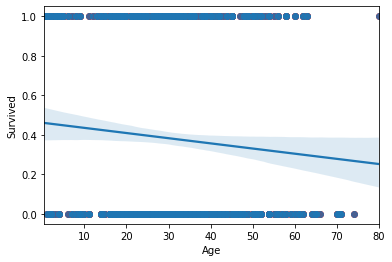

In [2]:
df["Survived"]=df["Survived"].map({'Yes':1,'No':0})
x=df[['Age','Pclass']].values
y=df['Survived'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
plt.scatter(df.Age,df.Survived, color='r')
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))
sns.regplot(x="Age",y='Survived', data=df)

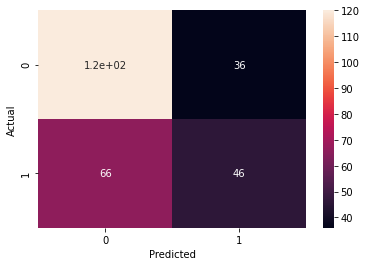

In [3]:
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm,annot=True)

In [ ]:
#ROC (Receiver Operator Characteristic)
#previously, we were using directly the threshold of 0.5 as reference to say if we correctly classified or not, and that's not 
#so accurate, but with ROC graphs(TP=f(FP)) we have more flexibility : there are many thresholds gathered
#so there are many confusion matrixes gathered (many sensitivities and many specificities (many points(sens,spec) that give us a curve))
#in these ROC graphs(TP=f(FP)) there's a green line in the middle (TP=FP) which says that every point on this line means that
#the proportion of the positives well classified equals the proportion of the negatives incorrectly classified
#ROC graphs tell us which threshold is the best for the classification
#AUC (Area Under the Curve) it helps comparing the ROC curves to one another, the more the AUC is high, the better the ROC curve is


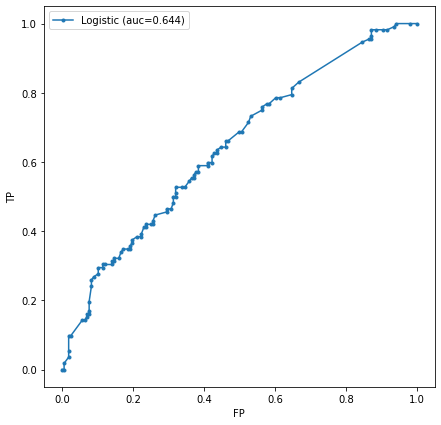

In [4]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.decision_function(x_test)
logistic_fpr, logistic_tpr, threshold=roc_curve(y_test,y_pred)
auc_logistic= auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(7,7))
plt.plot(logistic_fpr, logistic_tpr, marker='.' ,label='Logistic (auc=%0.3f)'%auc_logistic)
plt.xlabel('FP')
plt.ylabel('TP')
plt.legend()
plt.show()